In [2]:
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv(r'C:\Users\danie\Documents\Data\Company Financial - EDA\Financials.csv')

In [4]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [5]:
#Ideas to preproccesing 
#Remove '$' sign and '-' from all columns where they are present
#Change datatype from objects to int after the above two.
#Challenge: Try removing " , " (comma) from all numerical numbers.
#Try plotting sales and profit with respect to timeline

In [6]:
#checking for null
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [7]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [8]:
#Strip the whitespace from column names

In [10]:
df.columns = df.columns.str.strip()

In [15]:
#replace currency $ and commas
col = ['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Sales','COGS','Profit', 'Discounts']
df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
df[col] = df[col].apply(pd.to_numeric)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\danie\AppData\Local\Temp\ipykernel_22984\3322104331.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_22984\3322104331.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)


ValueError: Unable to parse string " -   " at position 187

In [74]:
# Check rows where conversion to numeric will fail
mask = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()

# Display rows with problematic data
df[mask.any(axis=1)]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,-,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,-,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,-,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,-,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,-,37050.00,24700.00,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Enterprise,Germany,Paseo,High,1085.00,10.00,125.00,135625.00,20343.75,115281.25,130200.00,(14918.75),01/10/2014,10,October,2014
684,Enterprise,France,Velo,High,663.00,120.00,125.00,82875.00,12431.25,70443.75,79560.00,(9116.25),01/09/2014,9,September,2014
686,Enterprise,United States of America,Velo,High,2438.00,120.00,125.00,304750.00,45712.50,259037.50,292560.00,(33522.50),01/12/2013,12,December,2013
692,Enterprise,Canada,VTT,High,2954.00,250.00,125.00,369250.00,55387.50,313862.50,354480.00,(40617.50),01/11/2013,11,November,2013


In [76]:
# Convert the columns to numeric, forcing errors to NaN
df[col] = df[col].apply(pd.to_numeric, errors='coerce')

In [78]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

In [80]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [82]:
## Exploratory Data Analysis (EDA)

In [84]:
Seg_Sales = df.groupby('Segment').agg({'Sales': ['mean'], 'Profit': ['mean']})

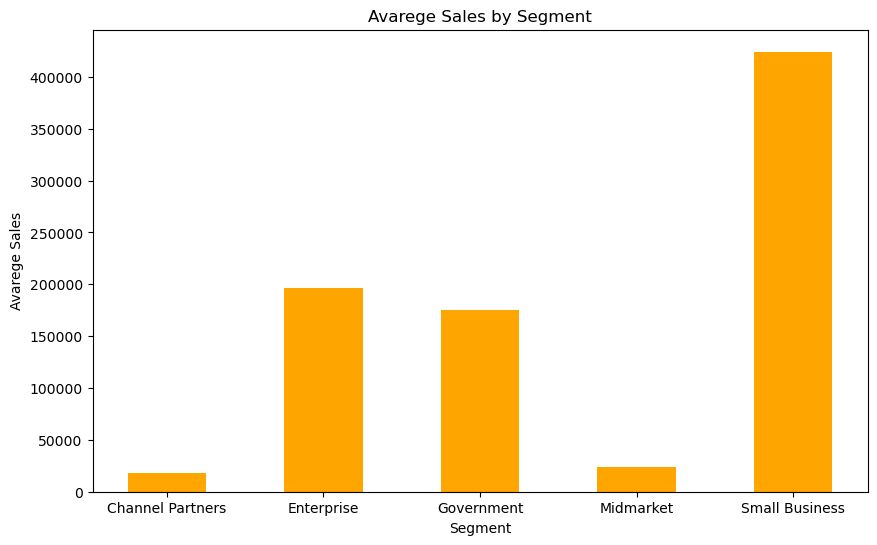

In [86]:
# Plot the bar chart
plt.figure(figsize=(10, 6))

plt.bar(Seg_Sales.index, Seg_Sales[('Sales', 'mean')], color="orange", width=0.5)

# labels and title
plt.xlabel('Segment')
plt.ylabel('Avarege Sales')
plt.title('Avarege Sales by Segment')

# Display 
plt.show()

#plot will show the mean sales for each segment.

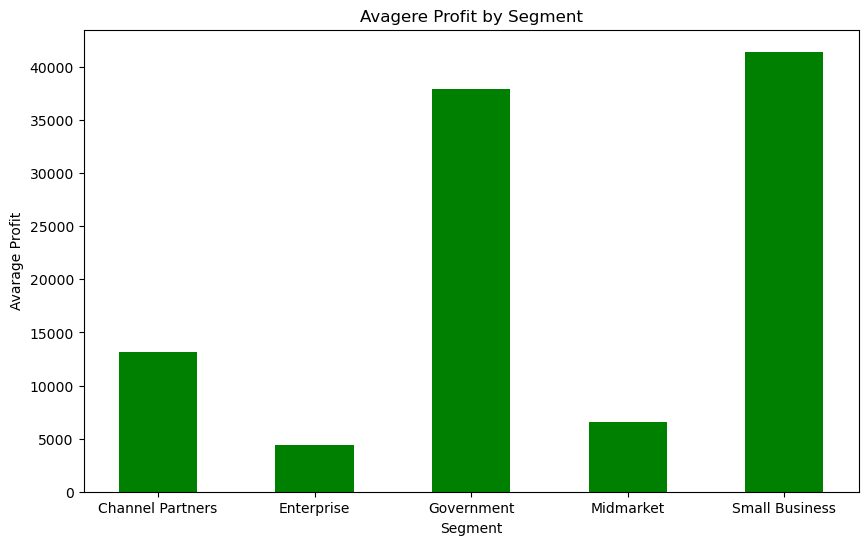

In [88]:
plt.figure(figsize=(10, 6))

plt.bar(Seg_Sales.index, Seg_Sales[('Profit', 'mean')], color="green", width=0.5)

# labels and title
plt.xlabel('Segment')
plt.ylabel('Avarage Profit')
plt.title('Avagere Profit by Segment')

# Display 
plt.show()

In [90]:
#sales and profit over time 
#Regression: Predicting continuous values like "Profit" or "Sales." (predict sales)
#Classification: Grouping into categories, like different "Segments" or "Countries." (Product and country)

In [92]:
df['Date'] = pd.to_datetime(df['Date'])

<function matplotlib.pyplot.show(close=None, block=None)>

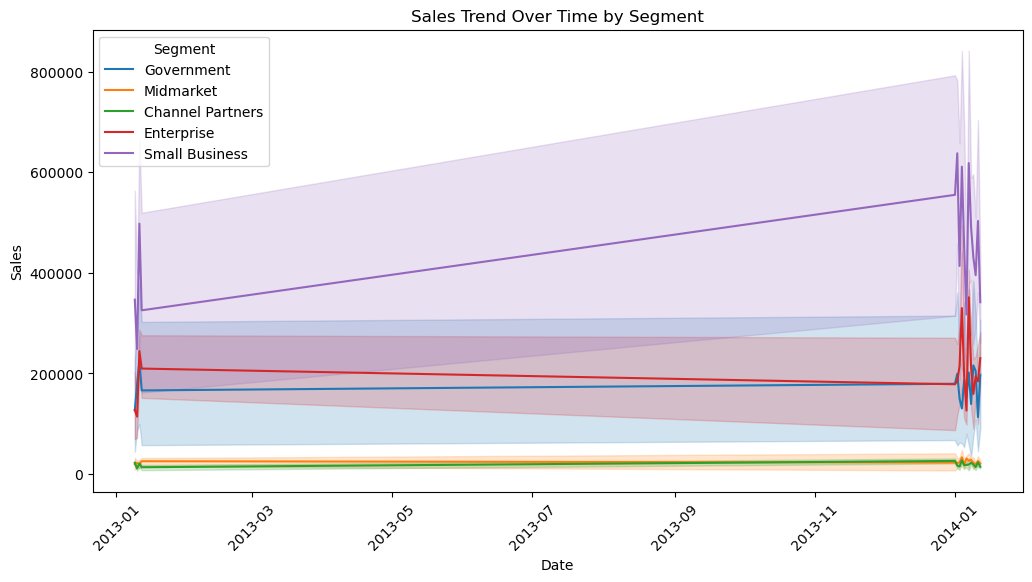

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Sales", hue="Segment", data=df)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time by Segment')
plt.xticks(rotation=45)

plt.show

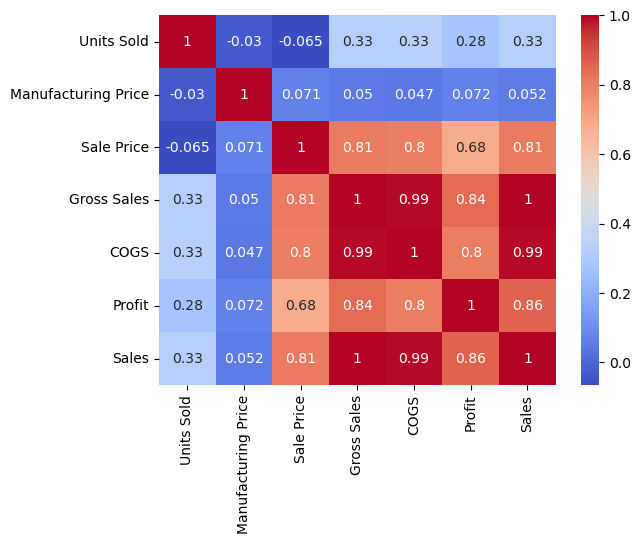

In [96]:
# Check correlation matrix
corr_matrix = df[['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'COGS', 'Profit', 'Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Gross Sales and Sales is highly correlated, "COGS" (Cost of Goods Sold) is close to "Profit" and "Sales"
#Drop "Gross Sales" and "COGS" from model

In [98]:
## Linear regression model

#Clean the Data - Remove rows with missing values in the specified columns
df_clean = df.dropna(subset=['Units Sold', 'Manufacturing Price', 'Sale Price', 'Profit', 'Sales'])

# Set up target variable (y) and features (X)
X = df_clean[['Units Sold', 'Manufacturing Price', 'Sale Price', 'Profit', 'Year']]
y = df_clean['Sales']


In [199]:
# split the data into training and testing sets

#Train-Test Split (splitting into training and testing sets)
from sklearn.model_selection import train_test_split

# 30% for testing, 70% for training; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [201]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train; only transform X_test (no fitting on test data)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
# train model on training data
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)


In [205]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 51866.62869409  -2389.51793597 121353.25948522 113099.58630547
   6541.380026  ]


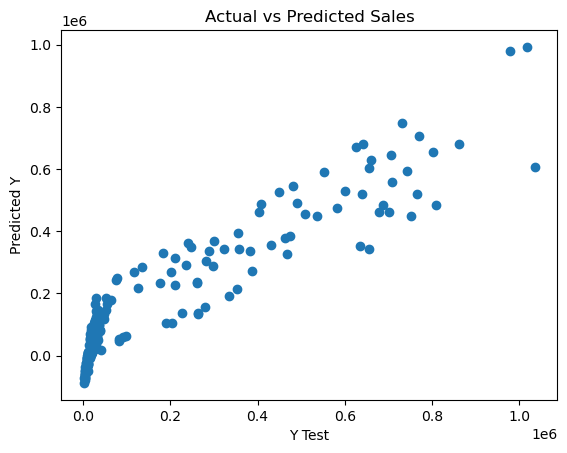

In [215]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Sales')
plt.show()

In [209]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3337585218.348203
MSE: 3.2606078311691993e+19
RMSE: 5710173229.569484


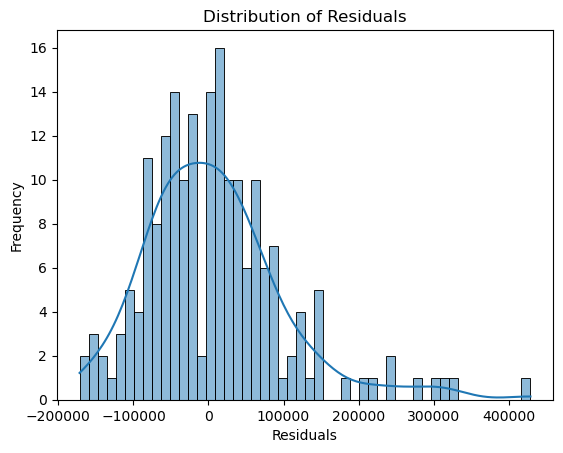

In [217]:
## Residuals
#a histogram of the residuals to make sure it looks normally distributed
sns.histplot((y_test - y_pred), bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [219]:
## Conclusion

coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                       Coeffecient
Units Sold            51866.628694
Manufacturing Price   -2389.517936
Sale Price           121353.259485
Profit               113099.586305
Year                   6541.380026
